# Ejercicio Python sobre las librerias Nimpy, Panda, Matplotlib y searbon.
Realizaremos un ejercicio de prueba para comprender como funciona estas librerias

## Conjunto de datos: Pacientes que sufren o no sufren de enfermedades cardiovasculares

### Descripción
El conjunto de datos "Cardiovascular Disease dataset" es un conjunto de datos que contiene información sobre pacientes que sufren o no sufren de enfermedades cardiovasculares. Fue creado con el propósito de predecir la presencia de enfermedades cardiovasculares en pacientes basándose en diferentes características y factores de riesgo.

### Descarga de los ficheros de datos
https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset


In [85]:
# importamos las librerias a utilizar
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import boxplot


%matplotlib inline

In [86]:
# Se crea el objeto url, definiendo la dirección web del dataset a utilizar
url = "https://raw.githubusercontent.com/ros1992/Dataset/main/cardio_train.csv"

# Dataset para prueba sin alterar el principal
df_prueba = pd.read_csv(url, delimiter=';')

# Se muestra las primeras 10 filas del dataset
df_prueba.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


<h2 style="color:blue">Visualización de la información general y el tamaño del dataset. Se hace uso de la función de pandas .info y .size </h2

In [87]:
# Se muestra la información general del dataset
df_prueba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [88]:
# se muestra el número total de datos (sumatoria de datos en columnas y filas)
df_prueba.size

910000

<h2 style="color:blue">A continuación, se detallan los atributos incluidos en el dataset:</h2>

  - age: Edad del paciente en años.
  - gender: Género del paciente (1 para mujer, 2 para hombre).
  - height: Altura del paciente en centímetros.
  - weight: Peso del paciente en kilogramos.
  - ap_hi: Presión arterial sistólica del paciente (la presión arterial máxima cuando el corazón late).
  - ap_lo: Presión arterial diastólica del paciente (la presión arterial mínima cuando el corazón está en reposo).
  - cholesterol: Niveles de colesterol del paciente (1: normal, 2: por encima de lo normal, 3: muy por encima de lo normal).
  - gluc: Niveles de glucosa en sangre del paciente (1: normal, 2: por encima de lo normal, 3: muy por encima de lo normal).
  - smoke: Si el paciente es fumador o no (0 para no fumador, 1 para fumador).
  - alco: Si el paciente consume alcohol o no (0 para no bebedor, 1 para bebedor).
  - active: Si el paciente es físicamente activo o no (0 para no activo, 1 para activo).
  - cardio: Variable objetivo que indica si el paciente tiene una enfermedad cardiovascular (0 para no tener enfermedad, 1 para tener enfermedad).

In [89]:

# Asignar los nuevos nombres de columna al DataFrame
df_prueba.columns = ['id', 'edad', 'gene', 'altu', 'peso', 'ap_hi', 'ap_lo', 'cole', 'gluc', 'fuma', 'alco', 'acti', 'card']

# Se muestran las 10 primeras filas del dataset para comprobar los cambios realizados
df_prueba.head(10)

,id,edad,gene,altu,peso,ap_hi,ap_lo,cole,gluc,fuma,alco,acti,card
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


<h2 style="color: blue">Con la ayuda de Seaborn iniciaremos con la visualización de los datos para evaluar la necesidad de depuración del dataset (valores pérdidos o outliers) <hr> Con la función de Seaborn .displot es posible realizar gráficas que representen la distribución de los datos </h2>


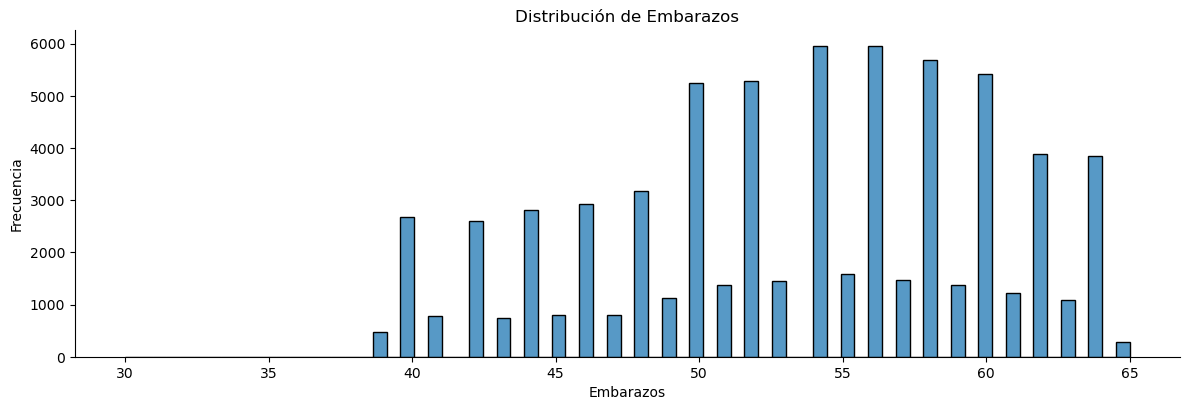

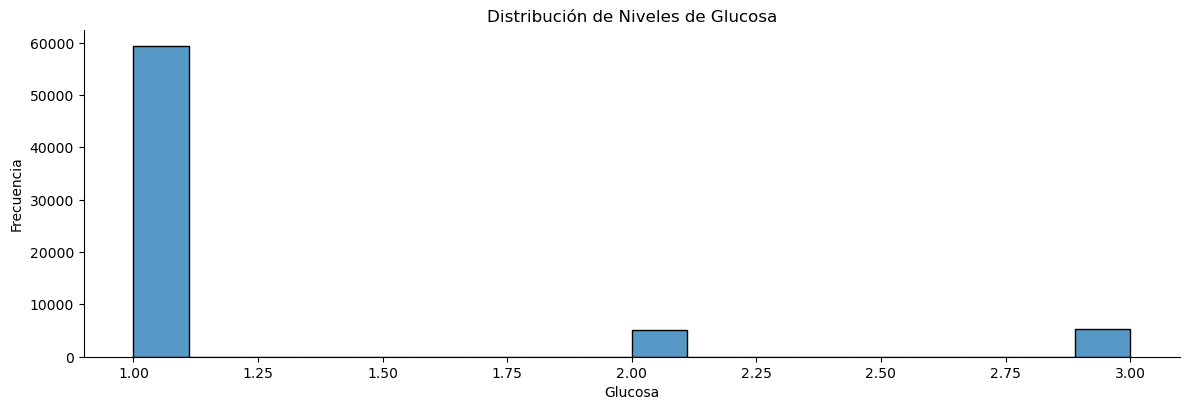

In [98]:
# Función para corregir la edad
def corregir_edad(edad):
    if edad > 120:  # Verificar si el valor parece ser incorrecto (por ejemplo, en días)
        return edad / 365  # Convertir de días a años
    return edad  # Mantener el valor original si parece ser una edad válida en años

# Aplicar la función de corregir_edad a la columna "edad"
df_prueba['edad'] = df_prueba['edad'].apply(corregir_edad)

# Se llama la función, se define el dataset, se específica la variable a graficar en el eje X y se ajusta el tamaño del gráfico
sns.displot(df_prueba, x="edad", aspect=3, height=4)
plt.title('Distribución de Embarazos')
plt.xlabel('Embarazos')
plt.ylabel('Frecuencia')

sns.displot(df_prueba, x="gluc", aspect=3, height=4)
plt.title('Distribución de Niveles de Glucosa')
plt.xlabel('Glucosa')
plt.ylabel('Frecuencia')
plt.show()

Tambien puede crearse dos graficas que no se superpongan. Estas graficas se organizan en un grid y se denominan subplots.

IndexError: index 3 is out of bounds for axis 0 with size 3

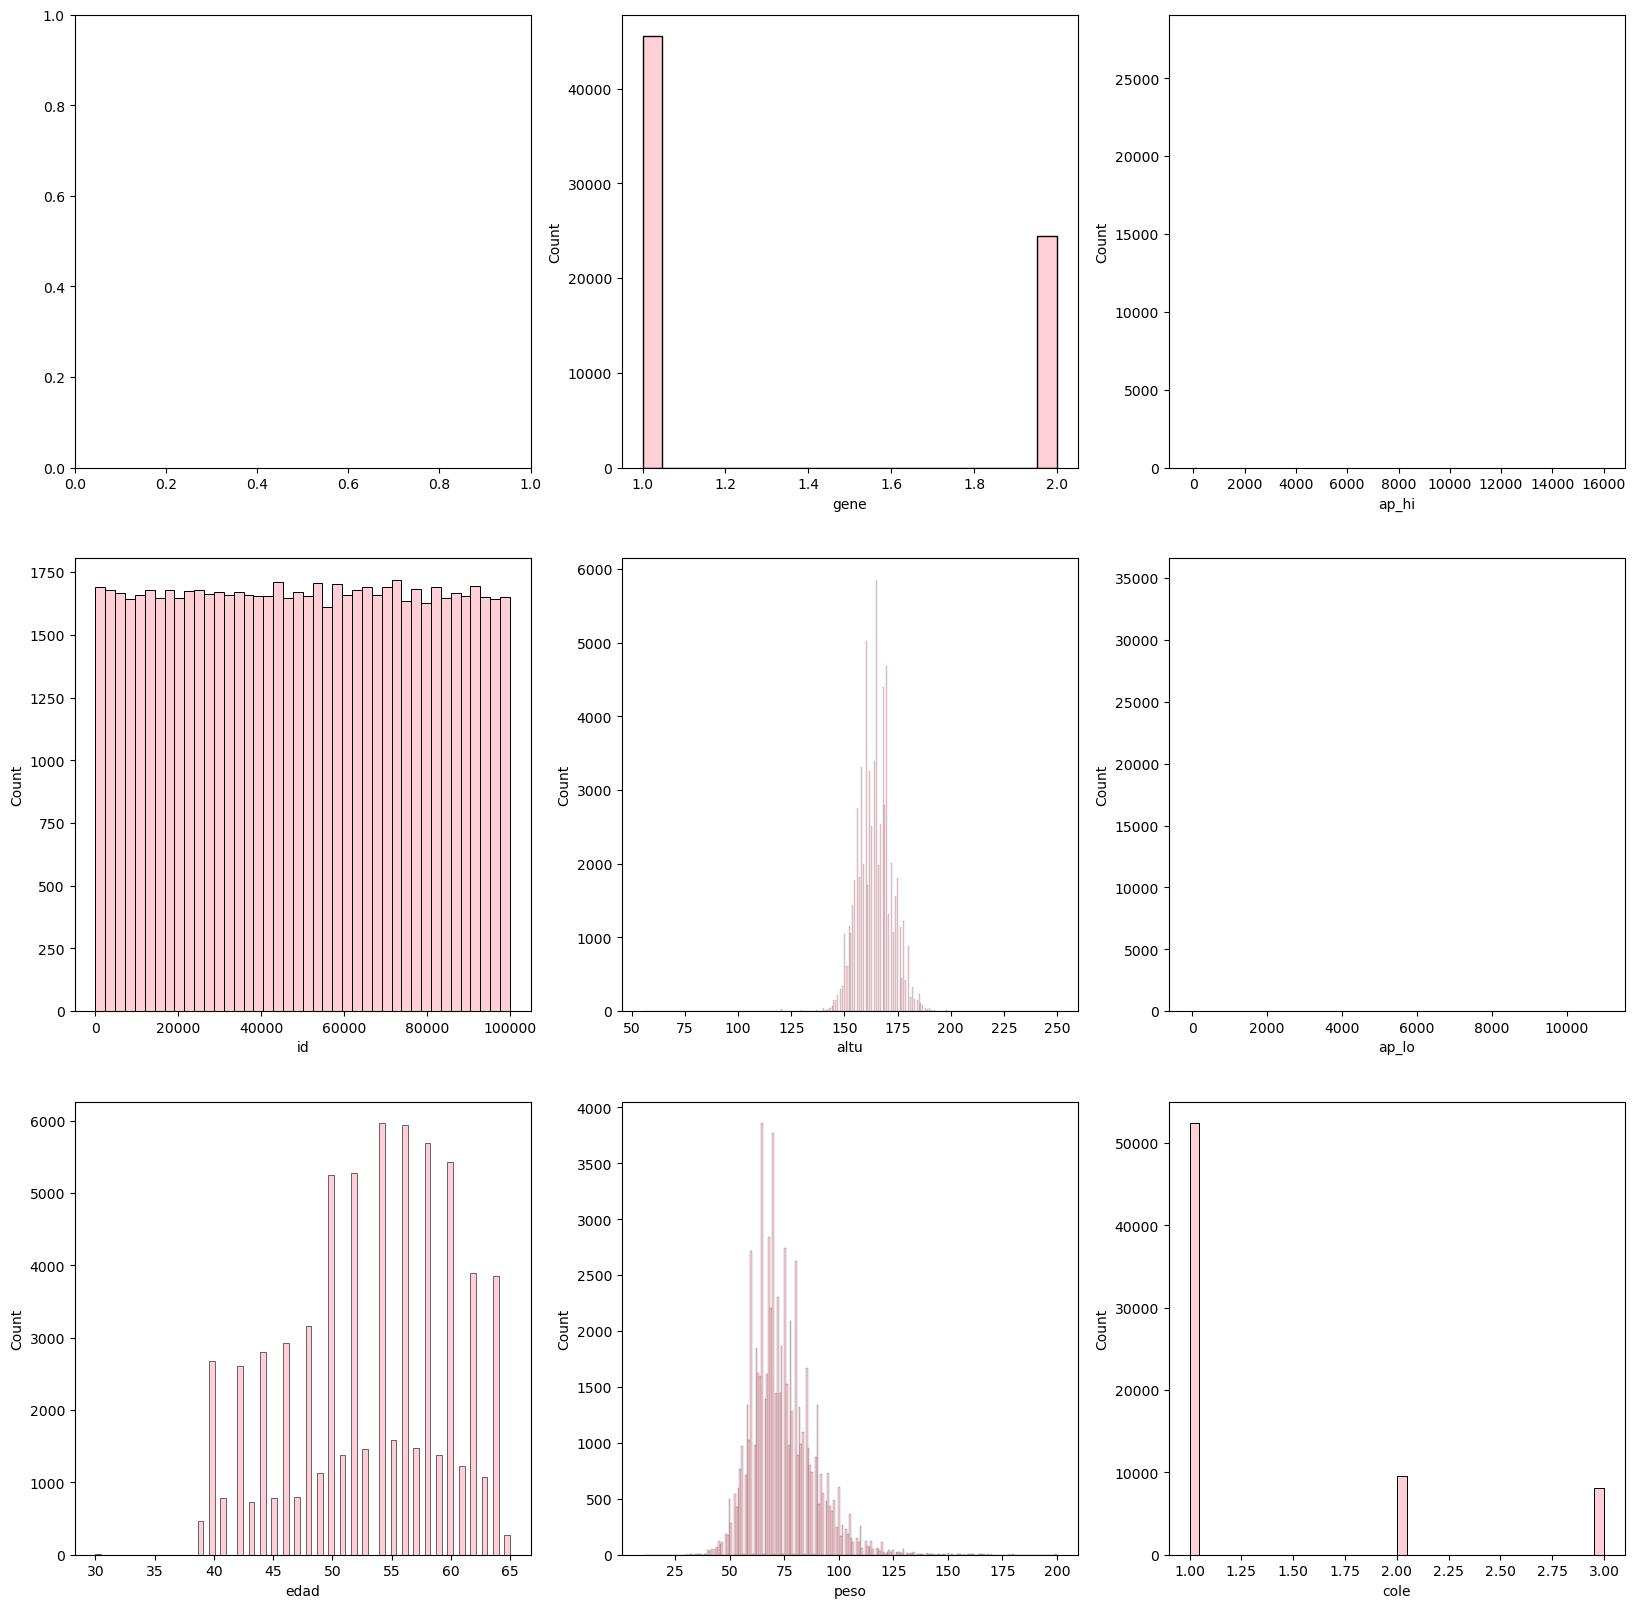

In [108]:
# Se crea un objeto con las características dimensionales del gráfico
fig, ax = plt.subplots(3, 3, figsize = (20, 20))

# Se crea el objeto Features para relacionar cada una de las variables en una lista de las columnas
Caracteristicas = list(df_prueba.columns)
i, j = 0, 0

# Para cada característica del dataset se implementa la función .hisplot
for Caracteristicas in Caracteristicas:
    sns.histplot(x = Caracteristicas, data = df_prueba, ax = ax[i][j], color='pink')
    i += 1
    if i >= 3:
        i = 0
        j += 1

<h2 style="color: blue">Otra opción en Seaborn es la función .boxplot que permite elaborar diagramas de caja. </h2>

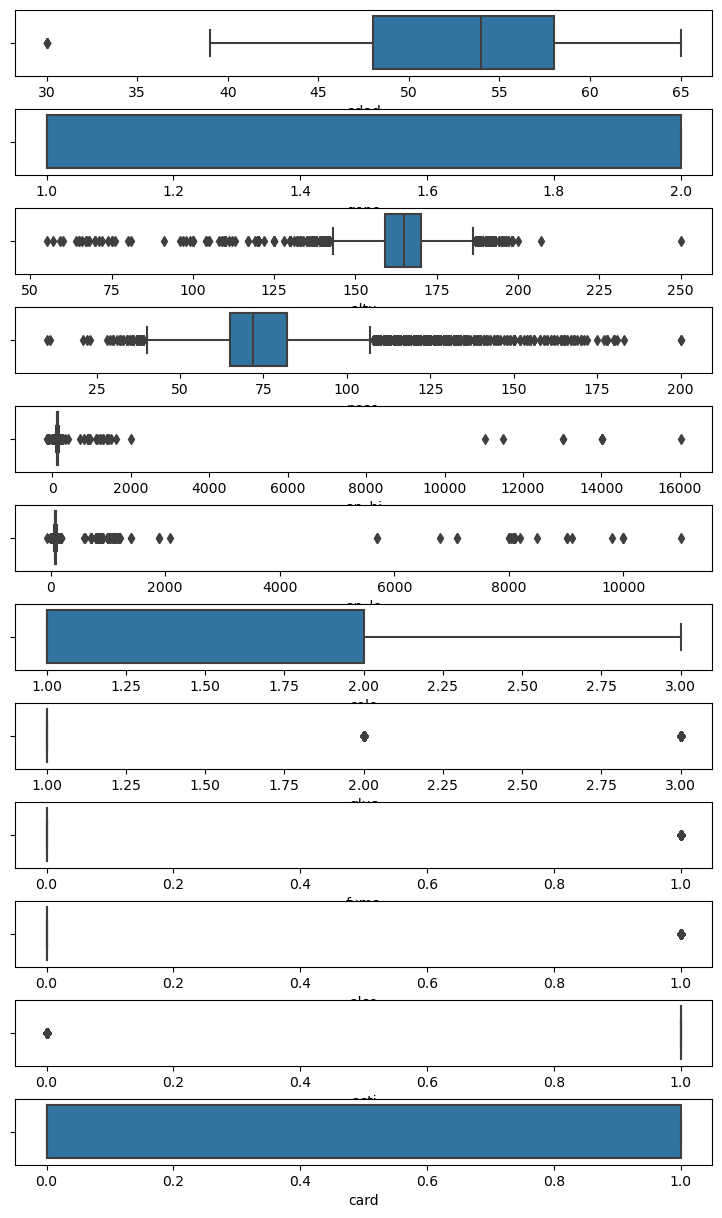

In [110]:
columns = ['edad', 'gene', 'altu', 'peso', 'ap_hi', 'ap_lo', 'cole', 'gluc', 'fuma', 'alco', 'acti', 'card']

# Se determinan las características del gráfico
fig, ax = plt.subplots(nrows=12, ncols=1, figsize=(9,15))
fig.subplots_adjust(hspace=0.5)

# Se aplican las características del gráfico al objeto creado con las columnas del dataset
for i, col in enumerate(columns):
    sns.boxplot(x=col, data=df_prueba, ax=ax[i])


<h2 style="color: blue">Podemos también crear gráficos para relacionar varias variables. Sí relacionamos la variable edad con la variable cardio podemos ver la relación existente entre la edad y la posibilidad de tener o no problema cardiaco.</h2>

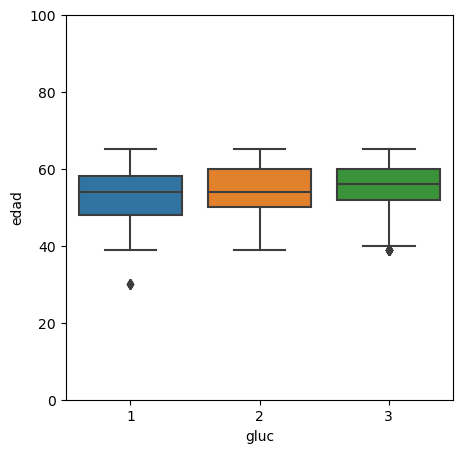

In [124]:
# Se crea el gráfico relacionando edad y cardio

# Se crea el objeto var (variación) y se le asigna la variable Resultado, esto para que en el gráfico relacione cada dato
# de la otra variable (edad) con el Resultado de esa fila (individuo) y representándolos con diferente color.
# Eiene Enfermedad (1) No Enfermedad (0)

# Se crean las características del gráfico a plotear
f, ax=plt.subplots(figsize=(5,5))

# Se crea la gráfica desde el dataset mediante la función .boxplot de seaborn
fig = sns.boxplot(x="gluc",y="edad",data=df_prueba)

# Se muestran los límites de los ejes x - y del gráfico
fig.axis(ymin=0,ymax=100)
plt.show()

<h2 style = "color: blue">Matriz de correlación mediante Numpy y representado gráficamente mediante un mapa de calor de Seaborn</h2>

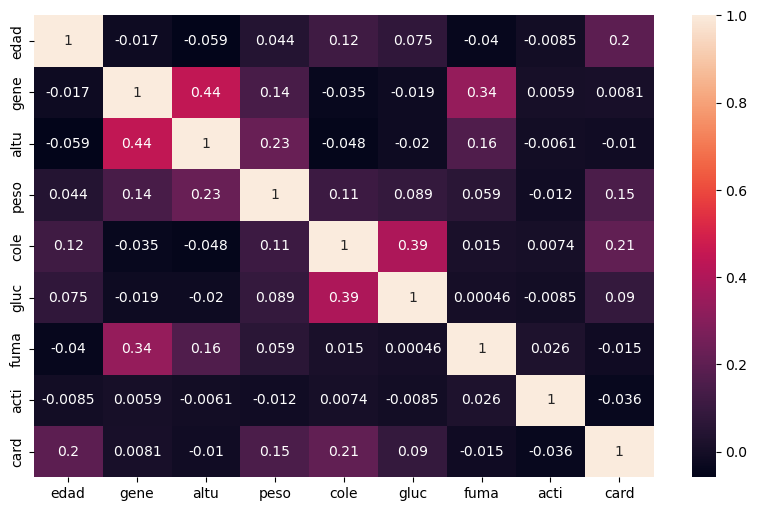

In [152]:
resumido = df_prueba.drop(columns = ['id','ap_hi', 'ap_lo', 'alco' ])
# Se crea el objeto, la correlación es alta cuando los rangos son similares entre dos variables
corrmat= resumido.corr(method='kendall')

# Se establece el tamaño del plot
plt.figure(figsize = [10, 6])

# A partir del objeto se crea la gráfica, datos, mostrar datos en el cuadro
sns.heatmap(corrmat, annot = True)

plt.show()

<h2 style="color: blue">Implementando y visualizando una regresión lineal a los datos</h2>

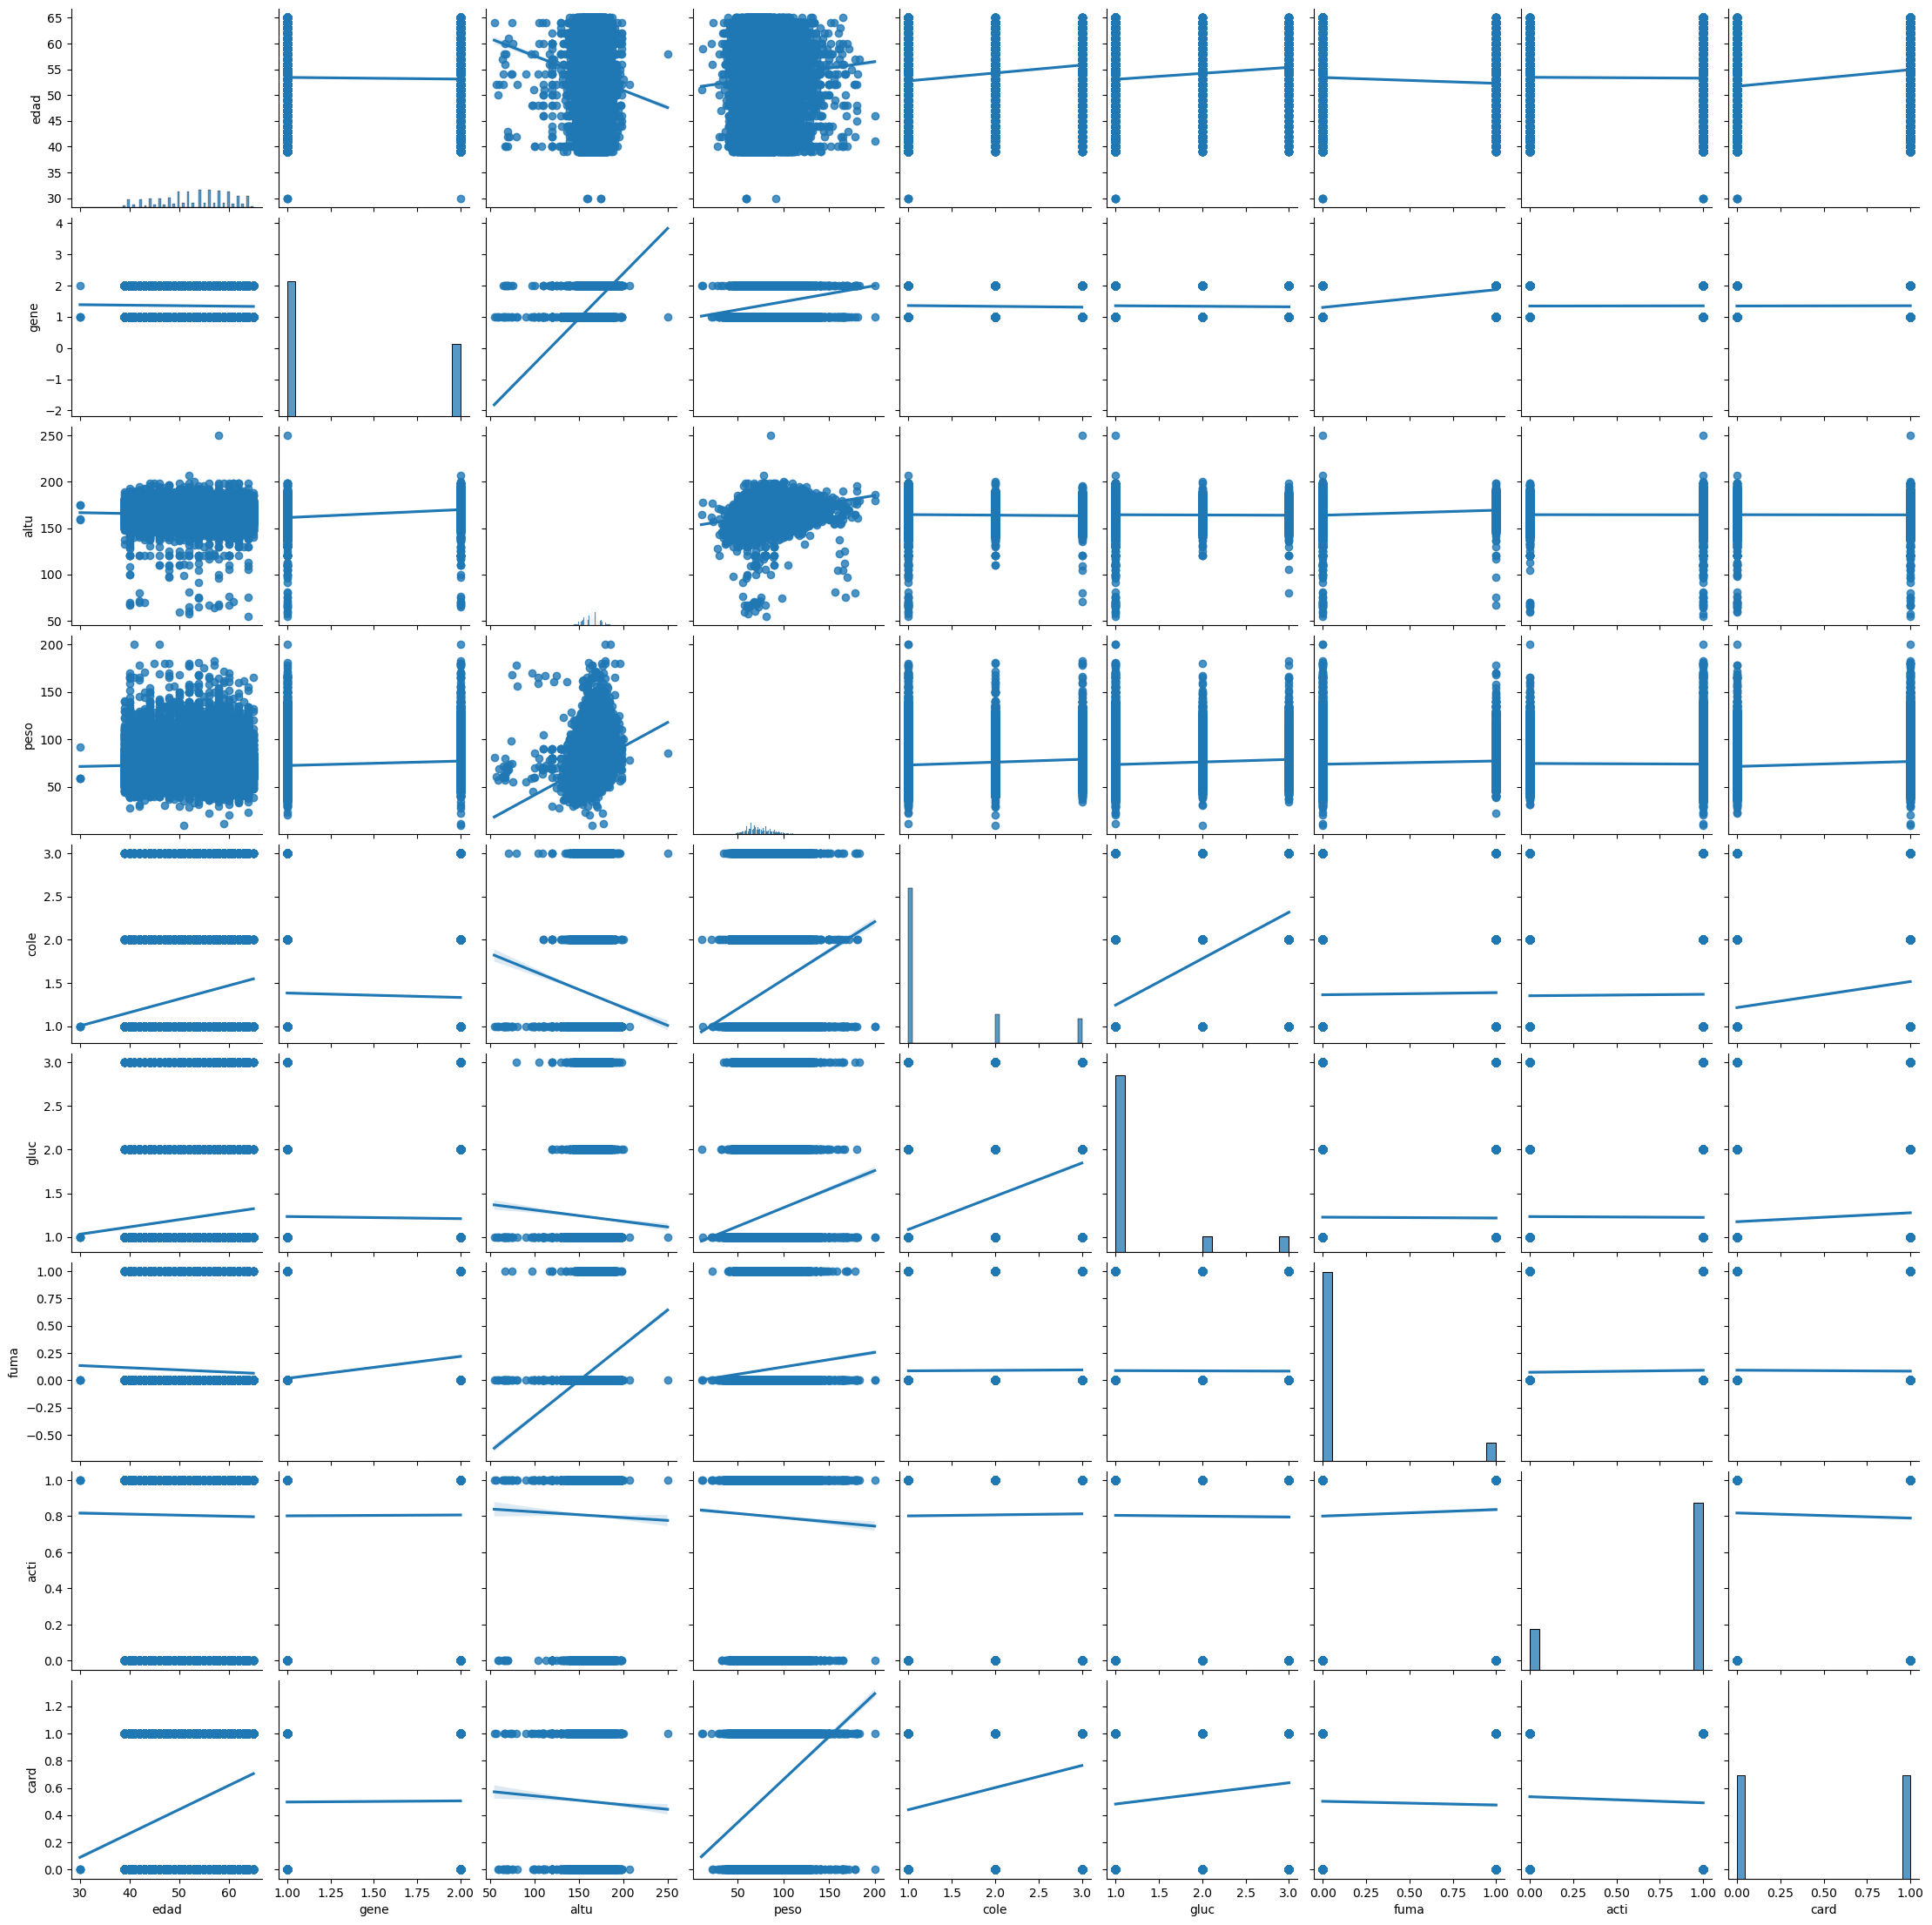

In [157]:
# En esta función se muestran las relaciones entre las variables (columnas). Para el tipo de gráfica se estableció la regresión
# Por defecto en la diagonal nos muestra un histograma de distribución
sns.pairplot(resumido, kind = 'reg')
plt.show()

<h2 style="color: blue">Relacionando las variables con una en específico mediante su visualización en color. En este caso se relacionan las variables entre sí y se pide se resalte cada dato en relación al Resultado: Enfermo del corazon (1) No Enfermo del corazon (0)</h2>

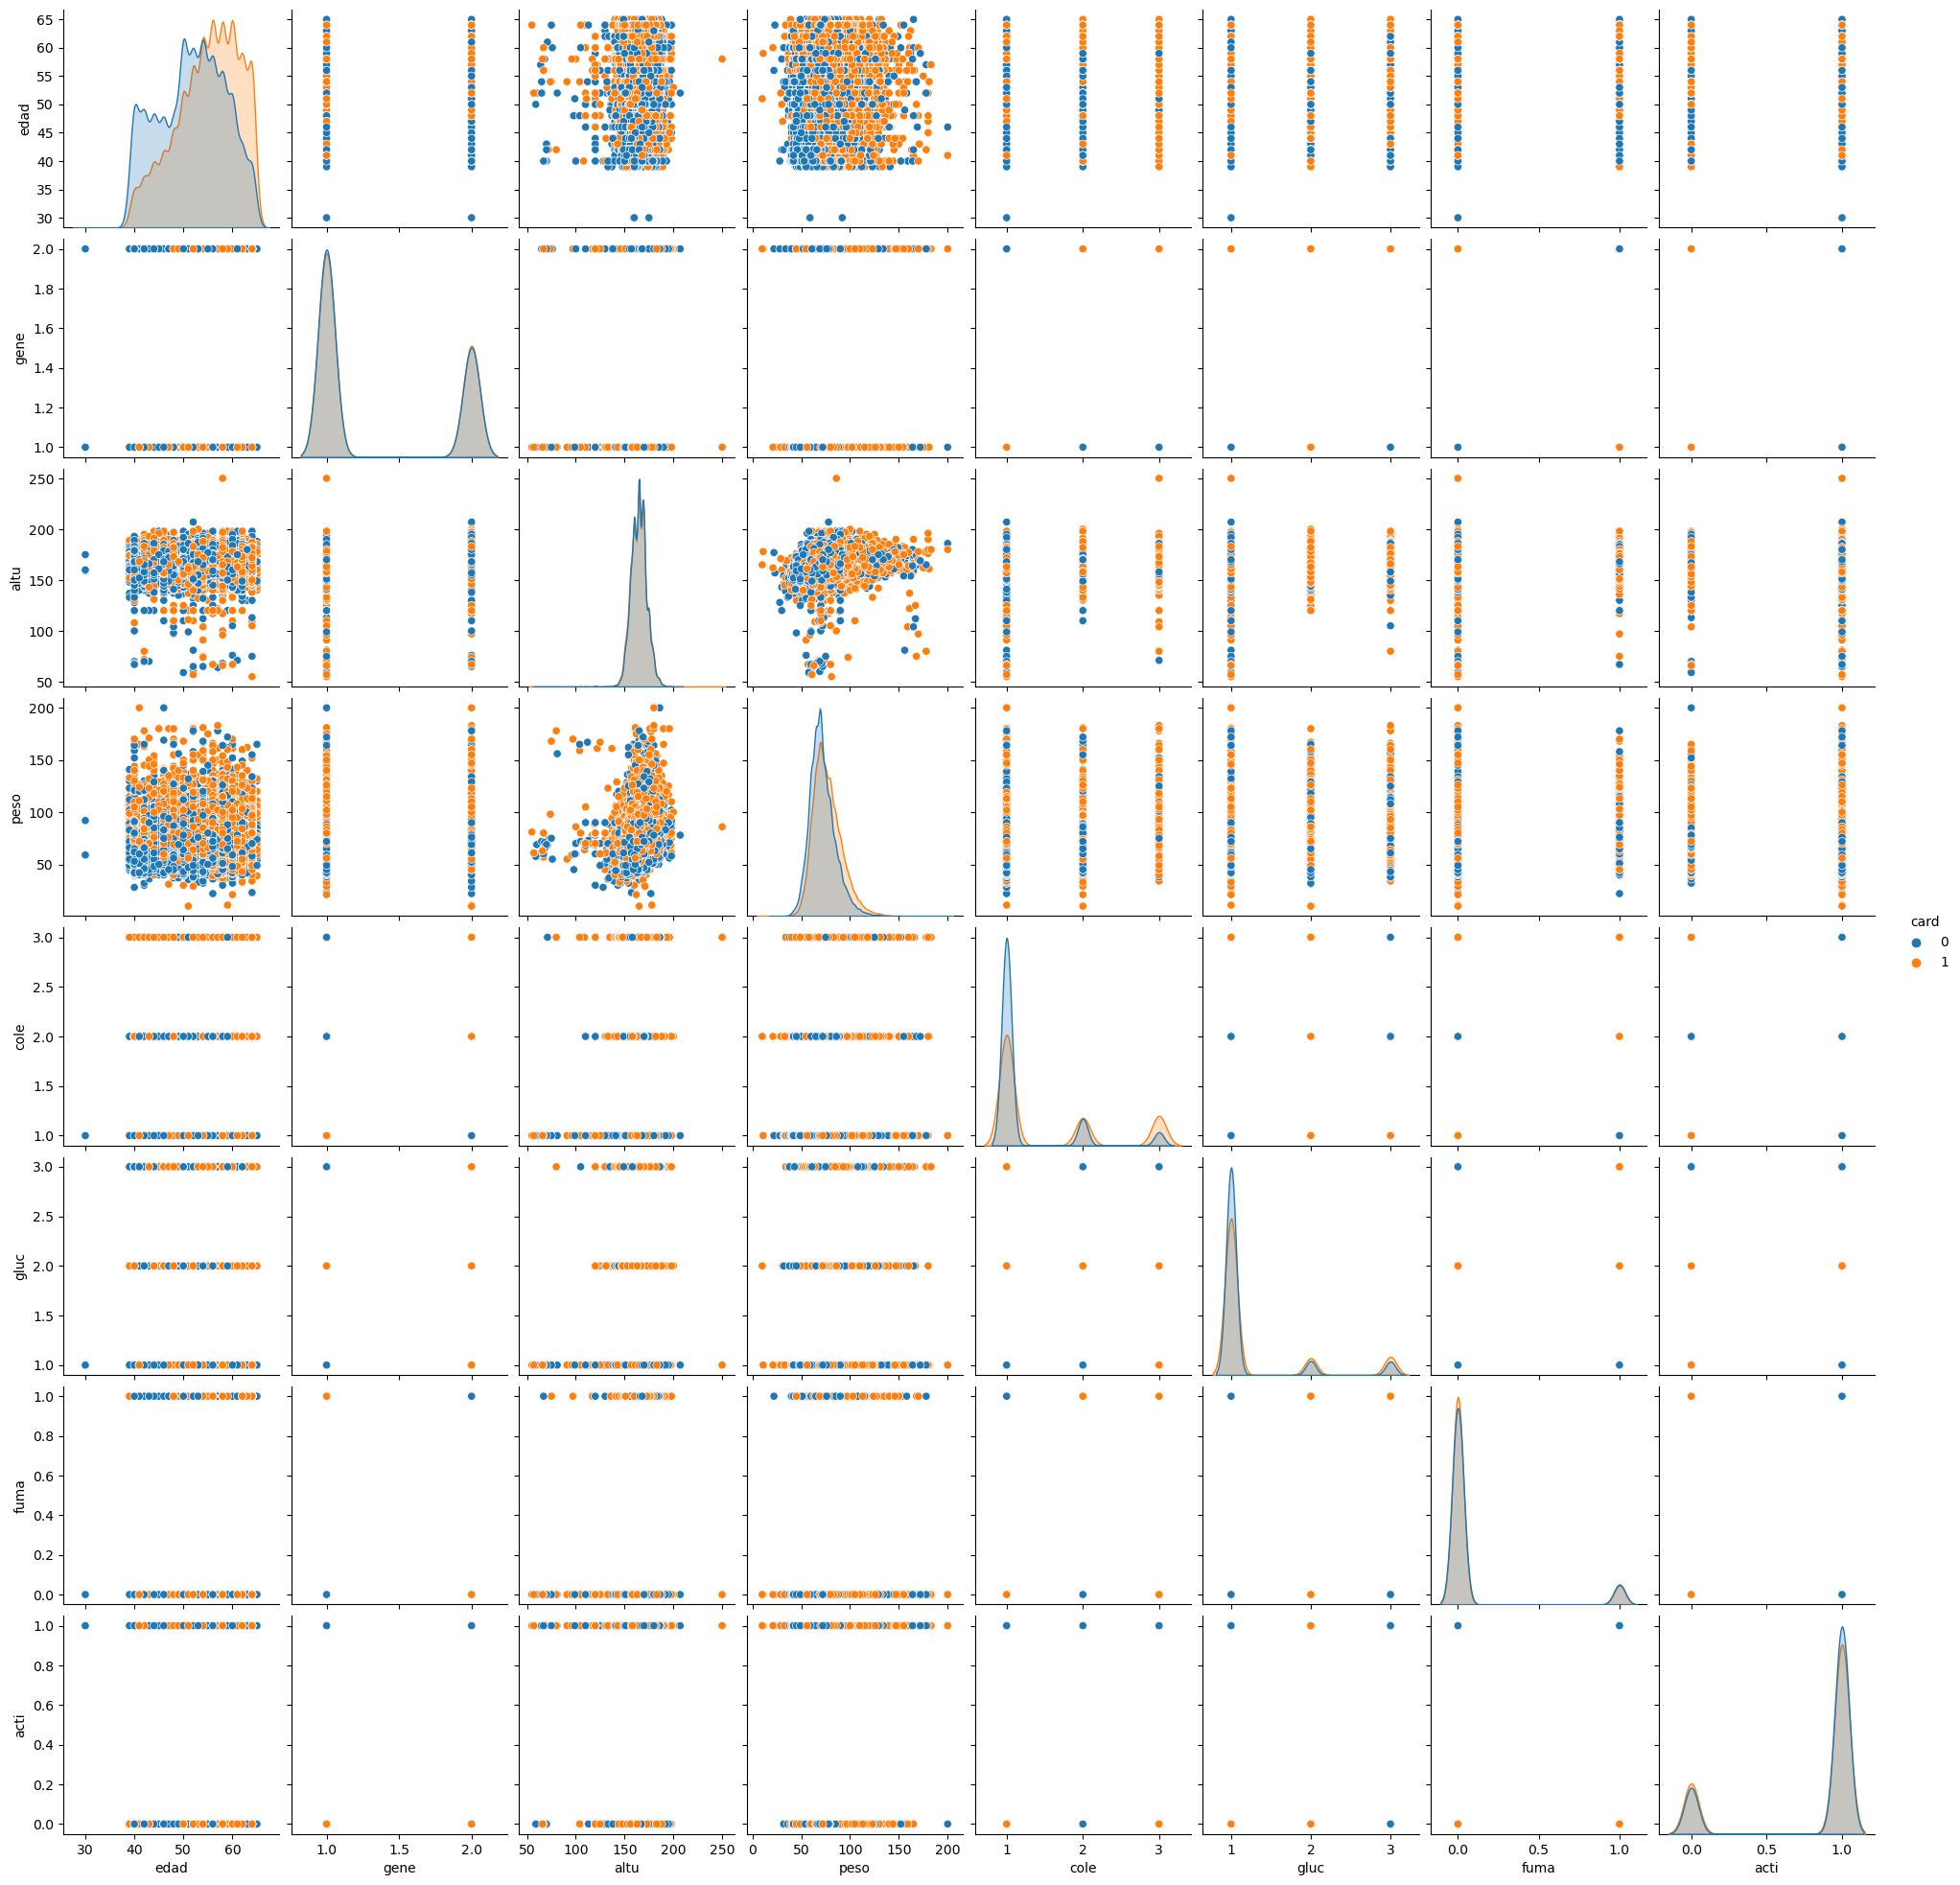

In [158]:
# función, datos a trabajar, tipo de diagonal a solicitar y relacionar en color la variable Resultado
sns.pairplot(resumido, diag_kind = 'kde', hue= 'card')
plt.show()

<h2 style="color:blue">Matplotlib</h2>
- Si a la función de trazado se le da una matriz de datos, la usará como coordenadas en el eje vertical, y utilizará el índice de cada punto de datos en el array como la coordenada horizontal.

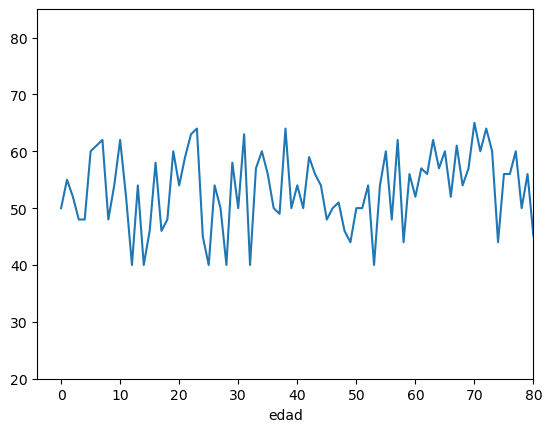

In [173]:
# Carga gamos la lista con las edades
lista = resumido['edad']

# Trazar la gráfica de línea para visualizar los valores de edades
plt.plot(lista)

# Establecer los límites del eje x e y para ajustar la escala
plt.axis([-4, 80, 20, 85])  # [xmin, xmax, ymin, ymax]

# Agregar etiqueta al eje x
plt.xlabel('edad')

# Mostrar la gráfica
plt.show()

<h2 style="color:blue">Scatter plots</h2>
es una herramienta de visualización que se utiliza para mostrar la relación entre dos variables numéricas. En este tipo de gráfico, cada punto representa una observación y se posiciona en el plano cartesiano en función de sus valores en ambas variables.

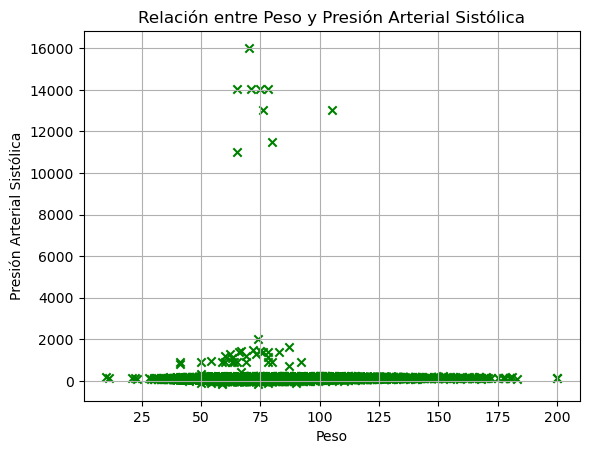

In [201]:
# Supongamos que tienes listas de pesos y presiones arteriales sistólicas
pesos = df_prueba['peso']
presion_arterial_sistolica = df_prueba['ap_hi']

# Trazar un scatter plot para visualizar la relación entre peso y presión arterial sistólica
plt.scatter(pesos, presion_arterial_sistolica, color='green', marker='x')
plt.grid(True)
plt.xlabel('Peso')
plt.ylabel('Presión Arterial Sistólica')
plt.title('Relación entre Peso y Presión Arterial Sistólica')
plt.show()

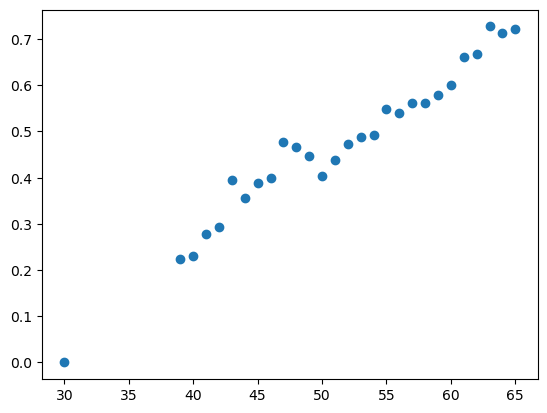

In [211]:
# Supongamos que "df" es tu DataFrame que contiene los datos
# Y quieres analizar la relación entre la edad y la presencia de enfermedades cardiovasculares
age_vs_cardio_df = df_prueba[['edad', 'card']]

# Calcular la tasa de enfermedades cardiovasculares por grupo de edad
age_grouped = age_vs_cardio_df.groupby('edad')['card'].mean()

# Crear el gráfico de dispersión
plt.scatter(age_grouped.index, age_grouped.values)
plt.show()

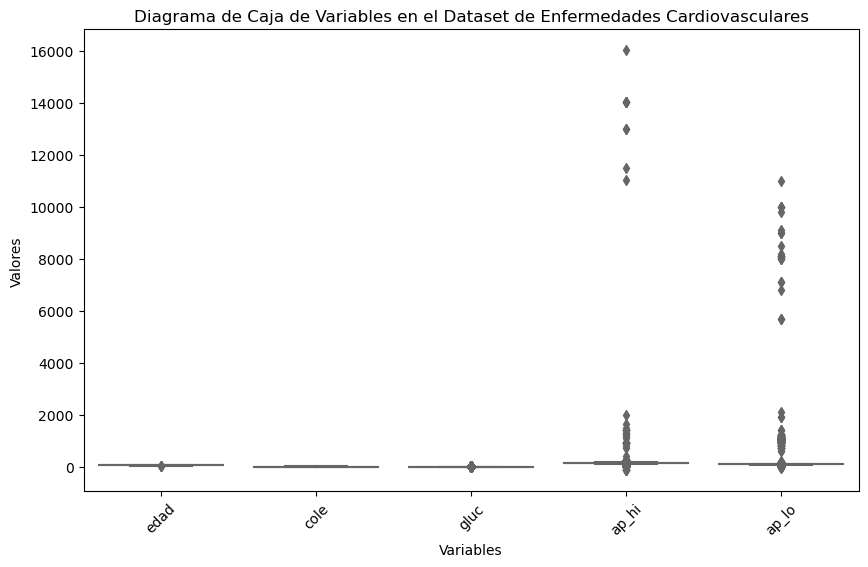

In [209]:
# Seleccionar algunas variables numéricas para el diagrama de caja
selected_variables = ['edad', 'cole', 'gluc', 'ap_hi', 'ap_lo']

# Crear el diagrama de caja con las variables seleccionadas
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_prueba[selected_variables], orient='v', palette='Set3')
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.title('Diagrama de Caja de Variables en el Dataset de Enfermedades Cardiovasculares')
plt.xticks(rotation=45)
plt.show()

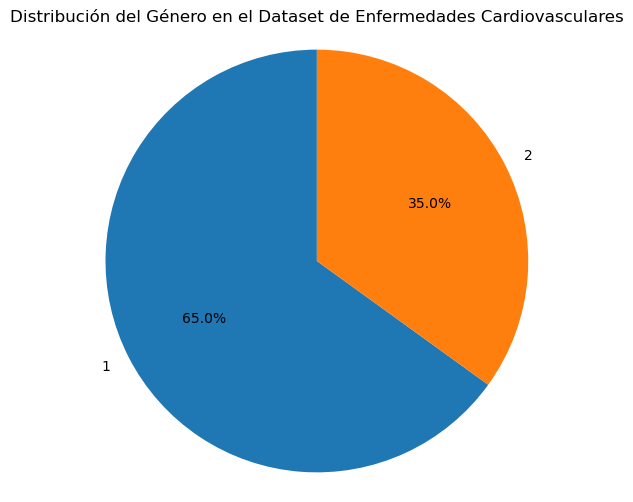

In [210]:
# Analizar los datos para obtener la distribución de una variable categórica, por ejemplo, el género
# Contar las ocurrencias de cada categoría en la columna 'gene' (género)
conteo_genero = df_prueba['gene'].value_counts()

# Crear el gráfico de pastel para visualizar la distribución del género
plt.figure(figsize=(6, 6))
plt.pie(conteo_genero, labels=conteo_genero.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución del Género en el Dataset de Enfermedades Cardiovasculares')
plt.axis('equal')  # Para asegurarse de que el gráfico sea un círculo
plt.show()

>Conclusión:
El análisis del dataset de enfermedades cardiovasculares muestra una muestra diversa de pacientes con información relevante sobre su edad, género, presión arterial, niveles de colesterol y glucosa. Se observa un desbalanceo en la distribución de género y la presencia de valores atípicos en algunas mediciones. El siguiente paso sería realizar análisis más detallados y modelos predictivos para comprender mejor los factores que influyen en las enfermedades cardiovasculares.